This is the file for the exploration of the data

In [20]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Loading in our data
df = pd.read_csv("data/metadata.csv")
df

,Unnamed: 0.1,Unnamed: 0,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,group_id
0,37,38,PAT_1431,1495,NaN,NaN,NaN,NaN,58,NaN,...,ACK,True,False,False,False,False,False,PAT_1431_1495_511.png,False,A
1,61,63,PAT_2051,4356,NaN,NaN,NaN,NaN,58,NaN,...,ACK,True,False,False,False,False,False,PAT_2051_4356_460.png,False,A
2,70,72,PAT_1255,876,NaN,NaN,NaN,NaN,60,NaN,...,ACK,False,True,False,False,False,False,PAT_1255_876_939.png,False,A
3,79,81,PAT_963,1820,False,True,ITALY,GERMANY,58,True,...,ACK,False,False,False,False,False,False,PAT_963_1820_823.png,True,A
4,94,96,PAT_419,832,False,False,POMERANIA,POMERANIA,80,False,...,BCC,True,False,True,False,True,True,PAT_419_832_706.png,True,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2001,2153,PAT_645,1461,False,False,GERMANY,GERMANY,58,True,...,BCC,True,True,False,False,True,True,PAT_645_1461_111.png,True,A
113,2006,2158,PAT_744,1404,False,False,GERMANY,GERMANY,90,False,...,BCC,True,True,False,False,False,True,PAT_744_1404_951.png,True,A
114,2025,2181,PAT_849,1613,False,False,BRAZIL,GERMANY,63,True,...,ACK,False,False,UNK,False,False,True,PAT_849_1613_824.png,True,A
115,2048,2214,PAT_43,61,False,False,GERMANY,GERMANY,76,False,...,SCC,True,UNK,False,UNK,True,True,PAT_43_61_210.png,True,A



Gender Distribution:
gender
FEMALE    38
MALE      36
Name: count, dtype: int64


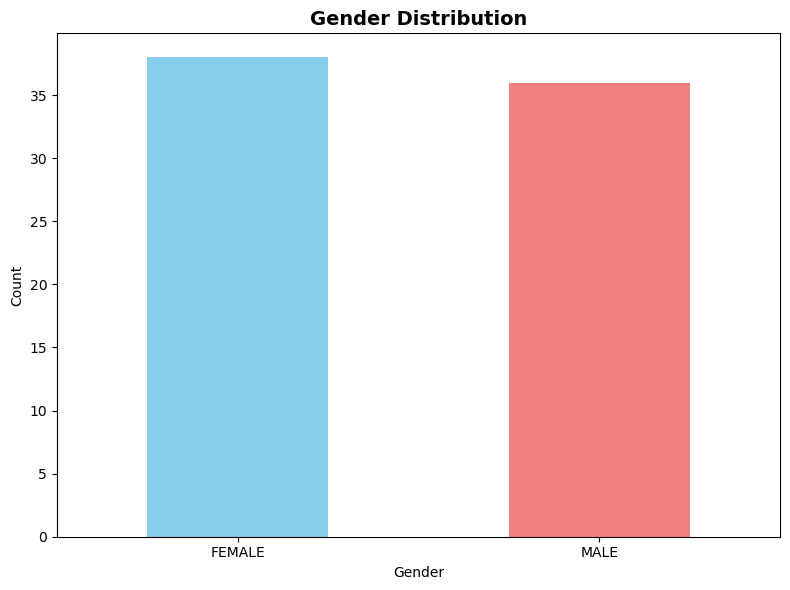

In [22]:
# Gender distribution
if 'gender' in df.columns:
    print("\nGender Distribution:")
    print(df['gender'].value_counts())
    
    plt.figure(figsize=(8, 6))
    df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


Age Statistics:
count    117.000000
mean      61.863248
std       14.709196
min        9.000000
25%       54.000000
50%       63.000000
75%       71.000000
max       91.000000
Name: age, dtype: float64


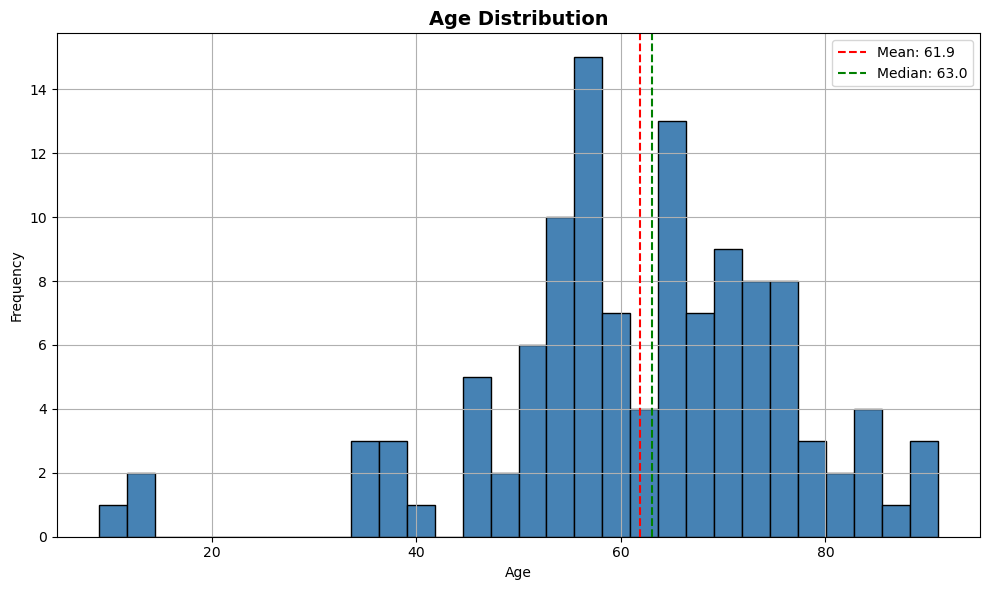

In [23]:
# Age Distribution
if 'age' in df.columns:
    print("\nAge Statistics:")
    print(df['age'].describe())
    
    plt.figure(figsize=(10, 6))
    df['age'].hist(bins=30, edgecolor='black', color='steelblue')
    plt.title('Age Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
    plt.axvline(df['age'].median(), color='green', linestyle='--', label=f'Median: {df["age"].median():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()


Diagnostic Distribution:
diagnostic
BCC    45
ACK    35
NEV    13
SEK    11
SCC    11
MEL     2
Name: count, dtype: int64


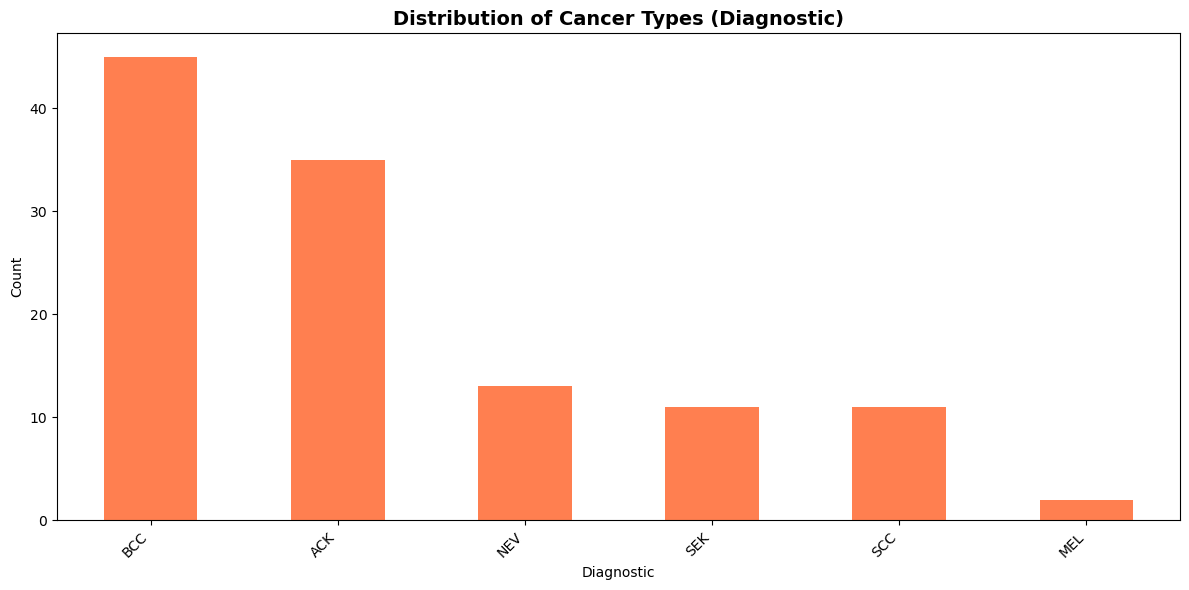

In [24]:
# Diagnostic (Cancer Type) Distribution
if 'diagnostic' in df.columns:
    print("\nDiagnostic Distribution:")
    print(df['diagnostic'].value_counts())
    
    plt.figure(figsize=(12, 6))
    diagnostic_counts = df['diagnostic'].value_counts()
    diagnostic_counts.plot(kind='bar', color='coral')
    plt.title('Distribution of Cancer Types (Diagnostic)', fontsize=14, fontweight='bold')
    plt.xlabel('Diagnostic')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/var/folders/gd/3qn4sczn2f73j1m12m7h5t6h0000gn/T/ipykernel_48150/728693577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnostic', y='age', ax=axes[1], palette='Set2')


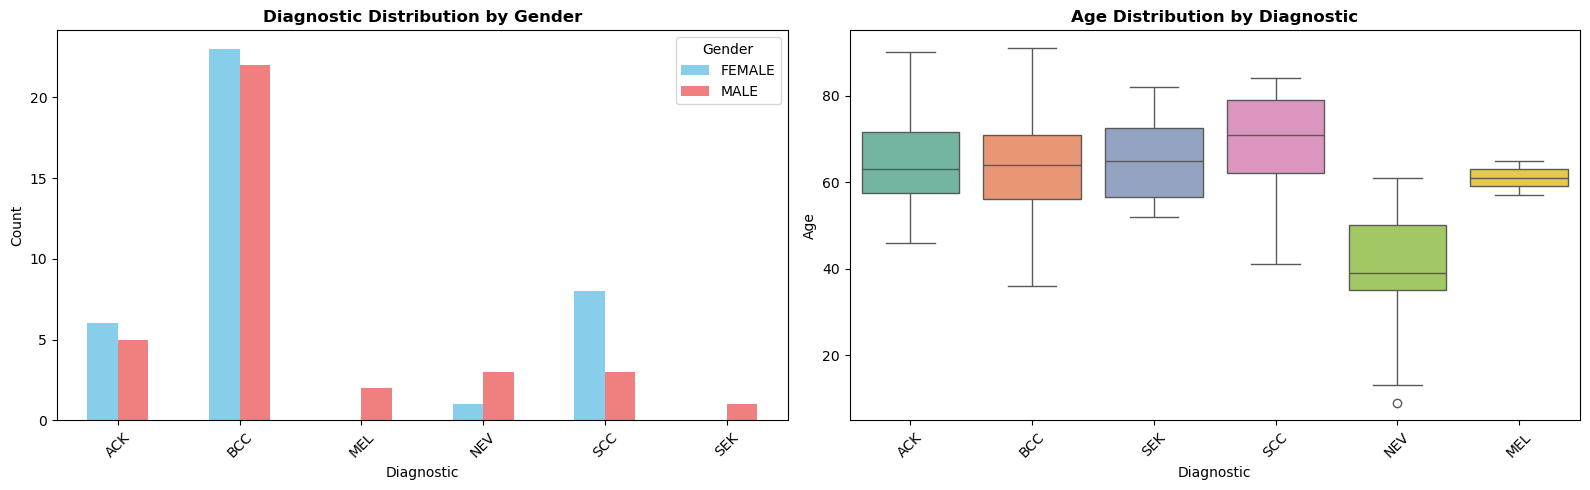

In [25]:
# Diagnostic vs Gender and Diagnostic vs Age
if 'diagnostic' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # 1. Diagnostic vs Gender
    if 'gender' in df.columns:
        crosstab = pd.crosstab(df['diagnostic'], df['gender'])
        crosstab.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
        axes[0].set_title('Diagnostic Distribution by Gender', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Diagnostic')
        axes[0].set_ylabel('Count')
        axes[0].legend(title='Gender')
        axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Diagnostic vs Age
    if 'age' in df.columns:
        sns.boxplot(data=df, x='diagnostic', y='age', ax=axes[1], palette='Set2')
        axes[1].set_title('Age Distribution by Diagnostic', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Diagnostic')
        axes[1].set_ylabel('Age')
        axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

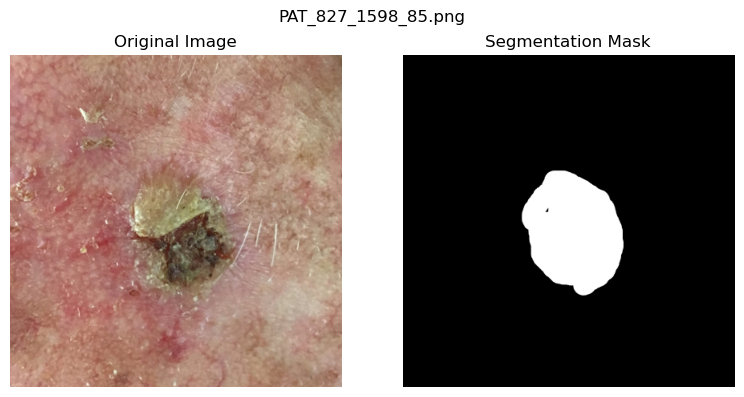

In [ ]:
img_path = "data/imgs/"
mask_path = "data/masks/"

# Get a random image id, you can also specify one yourself
for patient in df.itertuples():
    img = patient.img_id


# Load the image/mask
file_im = img_path + img
file_mask = (mask_path + img).replace(".png", "_mask.png")

im = plt.imread(file_im)
mask = plt.imread(file_mask)

# View image/mask
im = plt.imread(file_im)
mask = plt.imread(file_mask)

# Display im and mask side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display im
axes[0].imshow(im)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display mask
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

#add overall title for the figure
fig.suptitle(f'{image_id}')

plt.tight_layout()
plt.show()

# You can now use "im" and "mask" to answer the questions above
# It might be worth to refactor the above code into a function, so you can quickly load different images and masks given an image ID